# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [51]:
import pandas as pd
import graphviz
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [16]:
housing = pd.read_csv('housing.csv')
housing.dtypes

print(housing['ocean_proximity'].value_counts())

# A maioria da base de dados está em float64, o que é adequado para a nossa análise.
# A variável'ocean_proxymity' no entanto, é uma variável do tipo string, e precisaremos tomar os seus dummies.

housing = pd.get_dummies(housing, columns = ['ocean_proximity'])

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEA

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [29]:
corr = housing.corr()
print(housing.columns)
print(corr['median_house_value'])

#Das variáveis que possuímos, duas se destacam em potencial preditivo: a quantidade de median incomes, ou seja, a renda mediana das pessoas que residem
#nesta região... é importante pois é um bom indicador socio-econômico das pessoas que moram nesta região, e portanto, do valor do imóvel...

# E outra variável é a distância até a praia... sendo a categoria "inland" aquela que tem mais impacto negativo sobre o preço do imóvel, isto é, os
# imóveis que estão mais no interior do continente tendem a ser mais baratos...

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')
longitude                    -0.045967
latitude                     -0.144160
housing_median_age            0.105623
total_rooms                   0.134153
total_bedrooms                0.049686
population                   -0.024650
households                    0.065843
median_income                 0.688075
median_house_value            1.000000
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_INLAND       -0.484859
ocean_proximity_ISLAND        0.023416
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
Name: median_house_value, dtype: float64


### 3. Separe os dados em validação e teste

In [40]:
X = housing.drop(columns = ['median_house_value'])
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 40028922)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [43]:
regra_1 = DecisionTreeRegressor(max_depth=2)
regra_2 = DecisionTreeRegressor(max_depth=8)

regra_1.fit(X_train, y_train)
regra_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [47]:
mse1_treino = regra_1.score(X_train, y_train)
mse1_teste = regra_1.score(X_test, y_test)

mse2_treino = regra_2.score(X_train, y_train)
mse2_teste = regra_2.score(X_test, y_test)

print(f'A precisão da árvore 1 para os dados de treino foi {mse1_treino}, e para os dados de teste foi {mse1_teste}')
print(f'A precisão da árvore 2 para os dados de treino foi {mse2_treino}, e para os dados de teste foi {mse2_teste}')

A precisão da árvore 1 para os dados de treino foi 0.4951410224925894, e para os dados de teste foi 0.49176821178119756
A precisão da árvore 2 para os dados de treino foi 0.7583544524700955, e para os dados de teste foi 0.6888249182281829


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore mais adequada é, certamente, a árvore construída com a regra 2, que possui uma adequação para os dados de teste de 68% e para a base de treino de 75%

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

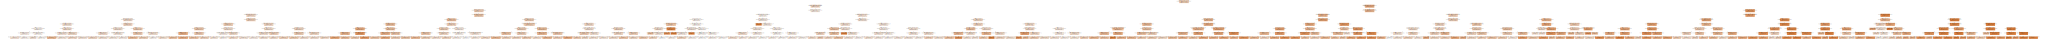

In [57]:
dados_arvore = tree.export_graphviz(regra_2, out_file=None, feature_names=X.columns, filled=True)
graph = graphviz.Source(dados_arvore, format='png')
graph



# Na árvore, assim como na nossa análise inicial, a variável mais importante é o "median_income", pois ela é a que ocupa a primeira quebra da mesma...